In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


In [21]:
df = pd.read_csv('covid_toy.csv')


In [22]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [23]:
df['age'].values

array([60, 27, 42, 31, 65, 84, 14, 20, 19, 64, 75, 65, 25, 64, 51, 70, 69,
       40, 64, 42, 12, 73, 71, 80, 13, 23, 19, 33, 16, 34, 15, 83, 34, 26,
       74, 82, 38, 55, 49, 50, 49, 82, 27, 22, 20, 72, 19, 18, 66, 44, 19,
       11, 47, 83, 60, 81, 71, 49, 23,  6, 24, 81, 56, 10, 42, 69, 51, 65,
       54, 73, 68, 75, 83, 34, 34,  5, 80,  8, 11, 48, 14, 65, 24, 17, 69,
       16, 25, 47,  5, 46, 59, 38, 82, 27, 79, 12, 51, 20,  5, 10])

<Axes: xlabel='age', ylabel='fever'>

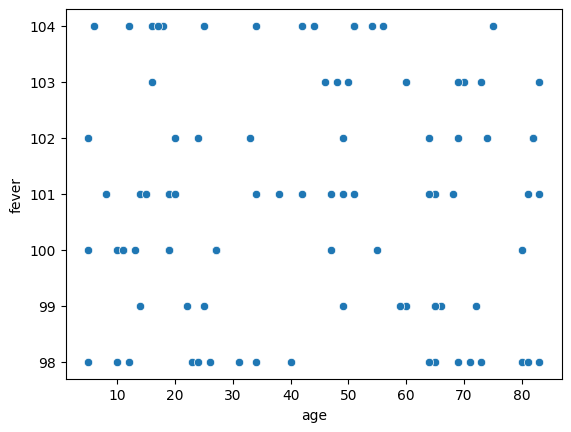

In [24]:
import seaborn as sns
sns.scatterplot(x=df['age'] , y = df['fever'])

In [25]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)


In [27]:
X_train

,age,gender,fever,cough,city
6,14,Male,101.0,Strong,Bangalore
62,56,Female,104.0,Strong,Bangalore
1,27,Male,100.0,Mild,Delhi
0,60,Male,103.0,Mild,Kolkata
18,64,Female,98.0,Mild,Bangalore
...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore
72,83,Female,101.0,Mild,Kolkata
31,83,Male,103.0,Mild,Kolkata
78,11,Male,100.0,Mild,Bangalore


### Normally 

In [28]:
si = SimpleImputer() ## Replace Missing Values 
X_train_fever = si.fit_transform(X_train[['fever']])
X_test_fever = si.fit_transform(X_test[['fever']])

X_train_fever.shape

(80, 1)

In [29]:
df.head(3)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No


In [32]:
## Ordinal Encoding  -> Cough

oe = OrdinalEncoder(categories=[['Mild','Strong']])
x_train_cough = oe.fit_transform(X_train[['cough']])

x_test_cough = oe.fit(X_train[['cough']]) 

In [34]:
## One hot Encoding 
ohe = OneHotEncoder(drop='first')
x_train_gender_city = ohe.fit_transform(X_train[['gender', 'city']])
x_test_gender_city = ohe.fit_transform(X_test[['gender', 'city']])

In [35]:
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [37]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,x_train_gender_city,x_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,x_test_gender_city,x_test_cough),axis=1)

X_train_transformed.shape

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 2 has 0 dimension(s)

### Column Transforms 


In [38]:
from sklearn.compose import ColumnTransformer



In [40]:
tranformer = ColumnTransformer(transformers = [
  ('tnf1', SimpleImputer(),['fever']),
  ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']),
  ('tnf3' , OneHotEncoder(drop='first'), ['gender', 'city'])
],remainder='passthrough')

In [42]:
tranformer.fit_transform(X_train).shape
tranformer.fit_transform(X_test).shape

(20, 7)